In [1]:
import pandas
import seaborn as sns
import matplotlib.ticker as tick
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [2]:
bioimg = pandas.read_csv('PubMed_Timeline_Results_by_Year_bioimaging.csv',header=1,
                         index_col='Year',dtype={'Count':'int'},thousands=',')
bioimg.rename(columns={'Count':'bioimaging_count'},inplace=True)
bioimg_a = pandas.read_csv('PubMed_Timeline_Results_by_Year_bioimage_analysis.csv',header=1,
                           index_col='Year',dtype={'Count':'int'},thousands=',')
bioimg_a.rename(columns={'Count':'bioimage_analysis_count'},inplace=True)
merged = pandas.concat([bioimg,bioimg_a],axis=1).fillna(0)
merged.drop([2023,1986,1988,1990],inplace=True)

In [3]:
total_citations = pandas.read_csv('medline_citation_counts_by_year.csv',usecols=['Year of Publication','Total # Citations']).set_index('Year of Publication')

In [4]:
merged = pandas.concat([merged,total_citations], axis=1).astype('int')
merged['bioimaging_norm'] = merged['bioimaging_count']/merged['Total # Citations']
merged['bioimage_analysis_norm'] = merged['bioimage_analysis_count']/merged['Total # Citations']
merged.head()

,bioimaging_count,bioimage_analysis_count,Total # Citations,bioimaging_norm,bioimage_analysis_norm
2022,2587,64,981270,0.002636,0.000065
2021,2689,70,1063140,0.002529,0.000066
2020,2292,58,993289,0.002307,0.000058
2019,2040,50,903225,0.002259,0.000055
2018,1808,35,866938,0.002086,0.000040


In [12]:
bioimg = pandas.read_csv('PubMed_Timeline_Results_by_Year_bioimaging.csv',header=1,
                         index_col='Year',dtype={'Count':'int'},thousands=',')
bioimg.rename(columns={'Count':'bioimaging_count'},inplace=True)
bioimg = pandas.concat([bioimg,total_citations], axis=1).fillna(0)
bioimg['bioimaging_norm'] = bioimg['bioimaging_count']/bioimg['Total # Citations']
bioimg = bioimg.drop([2023,1988,1990]).reset_index().rename(columns={'index':'Year'})

bioimg_a = pandas.read_csv('PubMed_Timeline_Results_by_Year_bioimage_analysis.csv',header=1,
                           index_col='Year',dtype={'Count':'int'},thousands=',')
bioimg_a.rename(columns={'Count':'bioimage_analysis_count'},inplace=True)
bioimg_a = pandas.concat([bioimg_a,total_citations], axis=1).fillna(0)
bioimg_a['bioimage_analysis_norm'] = bioimg_a['bioimage_analysis_count']/bioimg_a['Total # Citations']
bioimg_a = bioimg_a.drop([2023,1988,1986]).reset_index().rename(columns={'index':'Year'})

## Plots with overlays

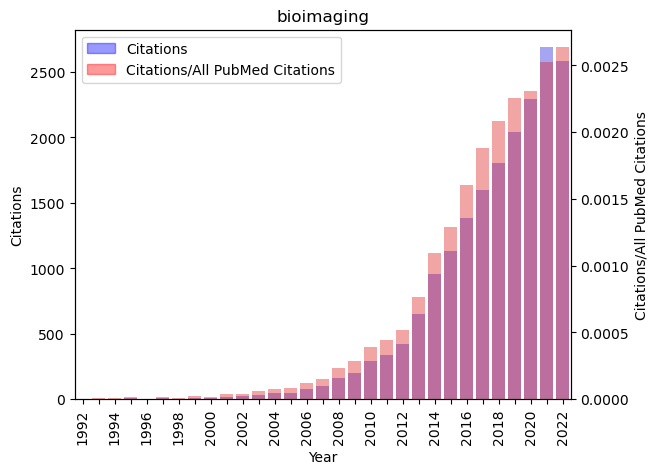

In [20]:
fig, ax1 = plt.subplots()

ax1 = sns.barplot(data=bioimg, x='Year',y='bioimaging_count', color = 'blue', alpha = .4)
labels = ax1.get_xticklabels()
ax1.set_xticklabels(rotation=90, labels = ['' if count%2!=0 else x for count, x in enumerate(labels)])
ax1.set_ylabel('Citations')
ax1.set_title('bioimaging')

ax2 = ax1.twinx()
ax2 = sns.barplot(data=bioimg, x='Year',y='bioimaging_norm', color = 'red',alpha = .4)
ax2.set_xticklabels(rotation=90, labels = ['' if count%2!=0 else x for count, x in enumerate(labels)])
ax2.set_ylabel('Citations/All PubMed Citations')

blue_patch = mpatches.Patch(color='blue', alpha = .4, label='Citations')
red_patch = mpatches.Patch(color='red',  alpha = .4, label='Citations/All PubMed Citations')
plt.legend(handles=[blue_patch,red_patch])

plt.savefig('bioimaging_citations.svg',bbox_inches='tight')
plt.savefig('bioimaging_citations.png',bbox_inches='tight')

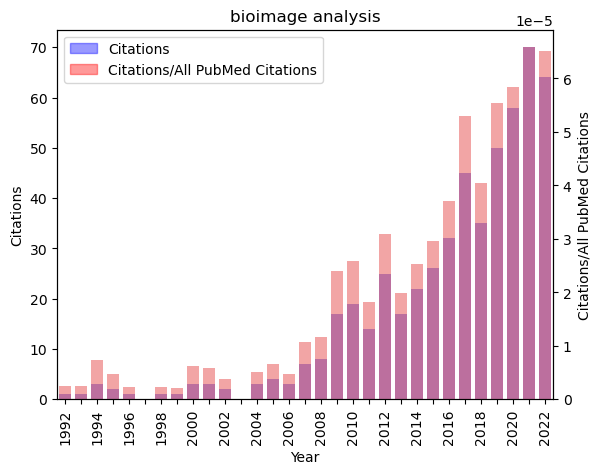

In [21]:
fig, ax1 = plt.subplots()

ax1 = sns.barplot(data=bioimg_a, x='Year',y='bioimage_analysis_count', color = 'blue', alpha = .4)
ax1.set_xticklabels(rotation=90, labels = ['' if count%2!=0 else x for count, x in enumerate(labels)])
ax1.set_ylabel('Citations')
ax1.set_title('bioimage analysis')

ax2 = ax1.twinx()
ax2 = sns.barplot(data=bioimg_a, x='Year',y='bioimage_analysis_norm', color = 'red',alpha = .4)
ax2.set_xticklabels(rotation=90, labels = ['' if count%2!=0 else x for count, x in enumerate(labels)])
ax2.set_ylabel('Citations/All PubMed Citations')

blue_patch = mpatches.Patch(color='blue', alpha = .4, label='Citations')
red_patch = mpatches.Patch(color='red',  alpha = .4, label='Citations/All PubMed Citations')
plt.legend(handles=[blue_patch,red_patch])

plt.savefig('bioimage_analysis_citations.svg',bbox_inches='tight')
plt.savefig('bioimage_analysis_citations.png',bbox_inches='tight')

## Side-by-side plots

/var/folders/hl/5b1z8zzj1710zl1_g94wkycc0000gp/T/ipykernel_76787/1335179882.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(np.round(ax1.get_yticks()/scale*1000,2))


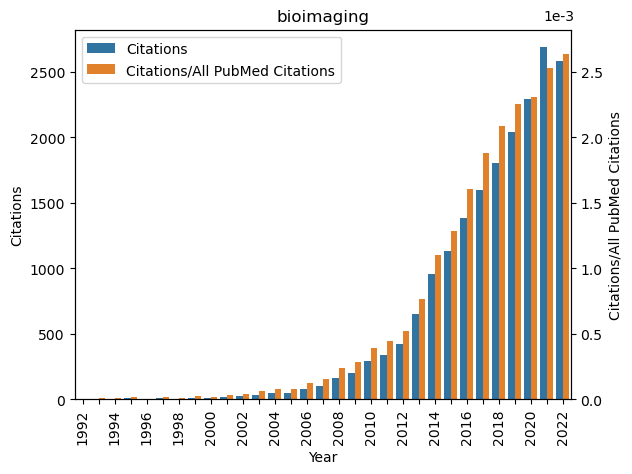

In [13]:
bioimg.drop(columns=["Total # Citations"], inplace=True)
bioimg_melt = pandas.melt(bioimg, id_vars=['Year'])

scale = 1000000
mask = bioimg_melt['variable'].isin(['bioimaging_norm'])
bioimg_melt.loc[mask, 'value'] = bioimg_melt.loc[mask, 'value']*scale

fig, ax1 = plt.subplots()

ax1 = sns.barplot(data=bioimg_melt, x='Year',y='value',hue='variable')
labels = ax1.get_xticklabels()
ax1.set_xticklabels(rotation=90, labels = ['' if count%2!=0 else x for count, x in enumerate(labels)])
ax1.set_ylabel('Citations')
ax1.set_title('bioimaging')

ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticklabels(np.round(ax1.get_yticks()/scale*1000,2))
ax2.set_ylabel('Citations/All PubMed Citations')

plt.text(.945, 1.026, '1e-3',transform=ax1.transAxes)

hands, labs = ax1.get_legend_handles_labels()
ax1.legend(title='',loc='upper left', handles=hands, labels=['Citations', 'Citations/All PubMed Citations'])

plt.savefig('bioimaging_citations_sidebyside.svg',bbox_inches='tight')
plt.savefig('bioimaging_citations_sidebyside.png',bbox_inches='tight')

/var/folders/hl/5b1z8zzj1710zl1_g94wkycc0000gp/T/ipykernel_76787/3591063320.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(np.round(ax1.get_yticks()/scale*100000,2))


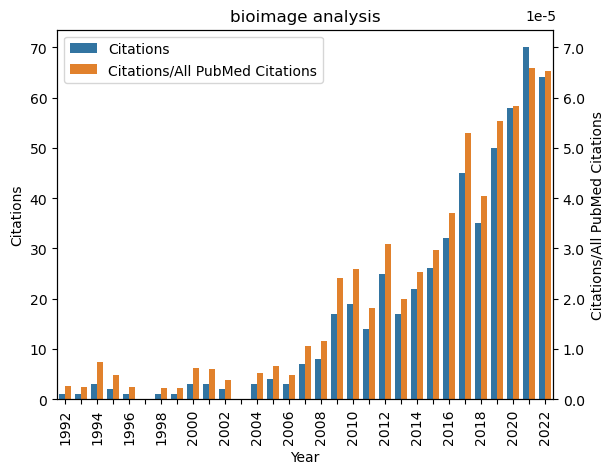

In [14]:
bioimg_a.drop(columns=["Total # Citations"], inplace=True)
bioimg_a_melt = pandas.melt(bioimg_a, id_vars=['Year'])
mask = bioimg_a_melt['variable'].isin(['bioimage_analysis_norm'])
scale = 1000000
bioimg_a_melt.loc[mask, 'value'] = bioimg_a_melt.loc[mask, 'value']*scale

fig, ax1 = plt.subplots()

ax1 = sns.barplot(data=bioimg_a_melt, x='Year',y='value',hue='variable')
labels = ax1.get_xticklabels()
ax1.set_xticklabels(rotation=90, labels = ['' if count%2!=0 else x for count, x in enumerate(labels)])
ax1.set_ylabel('Citations')
ax1.set_title('bioimage analysis')

ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticklabels(np.round(ax1.get_yticks()/scale*100000,2))
ax2.set_ylabel('Citations/All PubMed Citations')

plt.text(.945, 1.026, '1e-5',transform=ax1.transAxes)

hands, labs = ax1.get_legend_handles_labels()
ax1.legend(title='',loc='upper left', handles=hands, labels=['Citations', 'Citations/All PubMed Citations'])

plt.savefig('bioimage_analysis_citations_sidebyside.svg',bbox_inches='tight')
plt.savefig('bioimage_analysis_citations_sidebyside.png',bbox_inches='tight')

## Side-by-side, split by type

In [117]:
bioimg_a['query'] = 'bioimage analysis'
bioimg['query'] = 'bioimaging'
bioimg_a.columns = [x.replace('bioimage_analysis_','') for x in bioimg_a.columns]
bioimg.columns = [x.replace('bioimaging_','') for x in bioimg.columns]
merged = pandas.concat([bioimg, bioimg_a]).drop(columns=["Total # Citations"])
merged

,Year,count,norm,query
0,2022,2587.0,0.002636,bioimaging
1,2021,2689.0,0.002529,bioimaging
2,2020,2292.0,0.002307,bioimaging
3,2019,2040.0,0.002259,bioimaging
4,2018,1808.0,0.002086,bioimaging
...,...,...,...,...
26,1994,3.0,0.000007,bioimage analysis
27,1993,1.0,0.000003,bioimage analysis
28,1992,1.0,0.000003,bioimage analysis
29,2003,0.0,0.000000,bioimage analysis


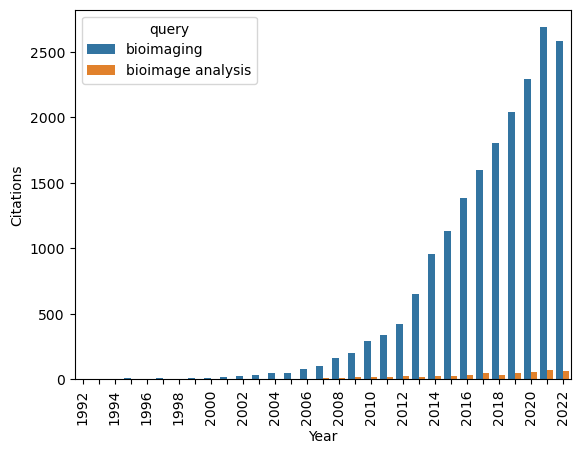

In [119]:
fig, ax1 = plt.subplots()

ax1 = sns.barplot(data=merged, x='Year',y='count',hue='query')
labels = ax1.get_xticklabels()
ax1.set_xticklabels(rotation=90, labels = ['' if count%2!=0 else x for count, x in enumerate(labels)])
ax1.set_ylabel('Citations')

plt.savefig('total_citations.svg',bbox_inches='tight')
plt.savefig('total_citations.png',bbox_inches='tight')


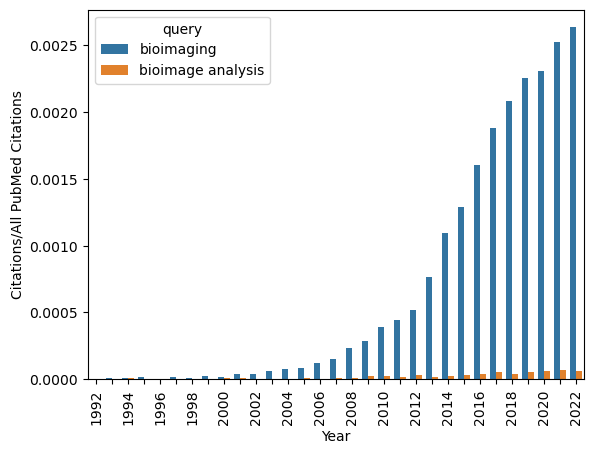

In [120]:
fig, ax1 = plt.subplots()

ax1 = sns.barplot(data=merged, x='Year',y='norm',hue='query')
labels = ax1.get_xticklabels()
ax1.set_xticklabels(rotation=90, labels = ['' if count%2!=0 else x for count, x in enumerate(labels)])
ax1.set_ylabel('Citations/All PubMed Citations')

plt.savefig('norm_citations.svg',bbox_inches='tight')
plt.savefig('norm_citations.png',bbox_inches='tight')
